In [6]:
import geopy
from geopy import distance #TODO BUGGONE
import math
import itertools
import pandas
import numpy
import networkx
from matplotlib import pyplot
import seaborn
%matplotlib inline

# Simulazione attacco, andamento D e GC in funzione dei nodi rimossi

In [7]:
#Funzioni step-by-step
def attacco(compagnia):
    adiacenzaFinal = numpy.genfromtxt(("/home/protoss/Documenti/Siscomp_datas/data/AdiacenzaEuclidea_{0}.csv".format(compagnia)),delimiter=',',dtype='int')
    grafoFinal = networkx.Graph(adiacenzaFinal)

    graphSize = networkx.number_of_nodes(grafoFinal)
    steps = graphSize
    passo = 1
    i = 0
    ascisse.append(i)
    aziendaFinal.append(compagnia)
#    diametro.append(2)
    relSizeGC.append(1)

    while (networkx.number_of_nodes(grafoFinal) > passo):
        gradiFinal = pandas.DataFrame(grafoFinal.degree().items(), columns=['index', 'grado'])
        gradiFinal.sort(["grado"], ascending=[False], inplace=True)
        sortedIDnode = gradiFinal['index'].values

        grafoFinal.remove_node(sortedIDnode[0])

        giantCluster = max(networkx.connected_component_subgraphs(grafoFinal), key = len)
        
        i += 100/float(steps)
        ascisse.append(i)
        aziendaFinal.append(compagnia)

        newGraphSize = networkx.number_of_nodes(grafoFinal)
#        diametro.append(networkx.diameter(giantCluster, e=None))
        relSizeGC.append((networkx.number_of_nodes(giantCluster))/(float(newGraphSize)))

def failure(compagnia):
    adiacenzaFinal = numpy.genfromtxt(("/home/protoss/Documenti/Siscomp_datas/data/AdiacenzaEuclidea_{0}.csv".format(compagnia)),delimiter=',',dtype='int')
    grafoFinal = networkx.Graph(adiacenzaFinal)

    graphSize = networkx.number_of_nodes(grafoFinal)
    steps = graphSize
    passo = 1
    i = 0
    ascisse.append(i)
    aziendaFinal.append(compagnia)
    diametro.append(2)
    relSizeGC.append(1)
    
    while (networkx.number_of_nodes(grafoFinal) > passo):
        gradiFinal = pandas.DataFrame(grafoFinal.degree().items(), columns=['index', 'grado'])
        randomante = gradiFinal['index'].values
        randomante = numpy.random.permutation(randomante)

        grafoFinal.remove_node(randomante[0])
    
        giantCluster = max(networkx.connected_component_subgraphs(grafoFinal), key = len)
                            
        i += 100/steps
        ascisse.append(i)
        aziendaFinal.append(compagnia)

        graphSize = networkx.number_of_nodes(grafoFinal)
#        diametro.append(networkx.diameter(giantCluster, e=None))
        relSizeGC.append((networkx.number_of_nodes(giantCluster))/(float(graphSize)))

In [8]:
#Funzioni percentuali
def attaccoPercent(compagnia, steps):
    adiacenzaFinal = numpy.genfromtxt(("/home/protoss/Documenti/Siscomp_datas/data/AdiacenzaEuclidea_{0}.csv".format(compagnia)),delimiter=',',dtype='int')
    grafoFinal = networkx.Graph(adiacenzaFinal)

    graphSize = networkx.number_of_nodes(grafoFinal)
    passo = networkx.number_of_nodes(grafoFinal)/steps

    i = 0
    ascisse.append(i)
    aziendaFinal.append(compagnia)
    diametro.append(2)
    relSizeGC.append(1)

    while (networkx.number_of_nodes(grafoFinal) > passo):
        gradiFinal = pandas.DataFrame(grafoFinal.degree().items(), columns=['index', 'grado'])
        gradiFinal.sort(["grado"], ascending=[False], inplace=True)
        sortedIDnode = gradiFinal['index'].values

#        grafoFinal.remove_nodes_from(sortedIDnode[0:passo])
        for identificativo in sortedIDnode:
            if (networkx.number_of_nodes(grafoFinal) > len(sortedIDnode) - passo):
                   grafoFinal.remove_node(identificativo)

        giantCluster = max(networkx.connected_component_subgraphs(grafoFinal), key = len)
        
        i += 100/float(steps)
        ascisse.append(i)
        aziendaFinal.append(compagnia)

        graphSize = networkx.number_of_nodes(grafoFinal)
        diametro.append(networkx.diameter(giantCluster, e=None))
        relSizeGC.append((networkx.number_of_nodes(giantCluster))/(float(graphSize)))


def failurePercent(compagnia, steps):
    adiacenzaFinal = numpy.genfromtxt(("/home/protoss/Documenti/Siscomp_datas/data/AdiacenzaEuclidea_{0}.csv".format(compagnia)),delimiter=',',dtype='int')
    grafoFinal = networkx.Graph(adiacenzaFinal)

    graphSize = networkx.number_of_nodes(grafoFinal)
    passo = networkx.number_of_nodes(grafoFinal)/float(steps)
    
    i = 0
    ascisse.append(i)
    aziendaFinal.append(compagnia)
    diametro.append(2)
    relSizeGC.append(1)
    
    while (networkx.number_of_nodes(grafoFinal) > passo):
        gradiFinal = pandas.DataFrame(grafoFinal.degree().items(), columns=['index', 'grado'])
        randomante = gradiFinal['index'].values
        randomante = numpy.random.permutation(randomante)

        for identificativo in randomante:
            if (networkx.number_of_nodes(grafoFinal) > len(randomante) - passo):
                grafoFinal.remove_node(identificativo)
    
        giantCluster = max(networkx.connected_component_subgraphs(grafoFinal), key = len)
                            
        i += 100/steps
        ascisse.append(i)
        aziendaFinal.append(compagnia)

        graphSize = networkx.number_of_nodes(grafoFinal)
        diametro.append(networkx.diameter(giantCluster, e=None))
        relSizeGC.append((networkx.number_of_nodes(giantCluster))/(float(graphSize)))

In [9]:
colori = ['#004184','#ff3300','#ff8000','#018ECC','#4d4d4d']
#gestore = ["Tim", "Vodafone", "Wind", "Tre", "Roma"]
gestore = ["Tim", "Vodafone", "Wind", "Tre"]

In [20]:
#Attacco
diametro = []
relSizeGC = []
aziendaFinal = []
ascisse = []

for provider in gestore:
    #%time attacco(provider)
    %time attaccoPercent(provider, 100)
    
datiFinal = pandas.DataFrame()

datiFinal['percent'] = ascisse
datiFinal['Provider'] = aziendaFinal
datiFinal['diameter'] = diametro
datiFinal['GCsize'] = relSizeGC
datiFinal.to_csv("/home/protoss/Documenti/SistemiComplessi/data/Iuri/AttackDataForSeaborn.csv")
#datiFinal.head()

CPU times: user 1min 34s, sys: 644 ms, total: 1min 35s
Wall time: 1min 34s
CPU times: user 1min 44s, sys: 696 ms, total: 1min 44s
Wall time: 1min 43s
CPU times: user 4min 40s, sys: 2.09 s, total: 4min 42s
Wall time: 4min 40s
CPU times: user 37.4 s, sys: 188 ms, total: 37.6 s
Wall time: 37.4 s


/home/protoss/Programmi/VirtualEnvironment/lib/python2.7/site-packages/ipykernel/__main__.py:17: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [5]:
#Failure
diametro = []
relSizeGC = []
aziendaFinal = []
ascisse = []

for provider in gestore:
    %time failurePercent(provider, 100)

datiFinal = pandas.DataFrame()

datiFinal['percent'] = ascisse
datiFinal['Provider'] = aziendaFinal
datiFinal['diameter'] = diametro
datiFinal['GCsize'] = relSizeGC
datiFinal.to_csv("/home/protoss/Documenti/SistemiComplessi/data/Iuri/FailureDataForSeaborn.csv")
#datiFinal

NameError: name 'failurePercent' is not defined

## Faccio i grafici

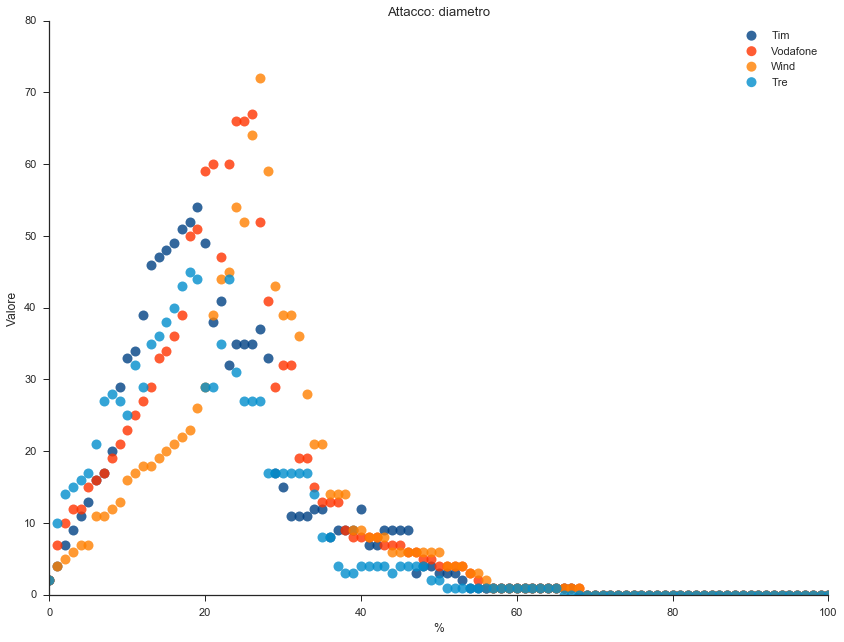

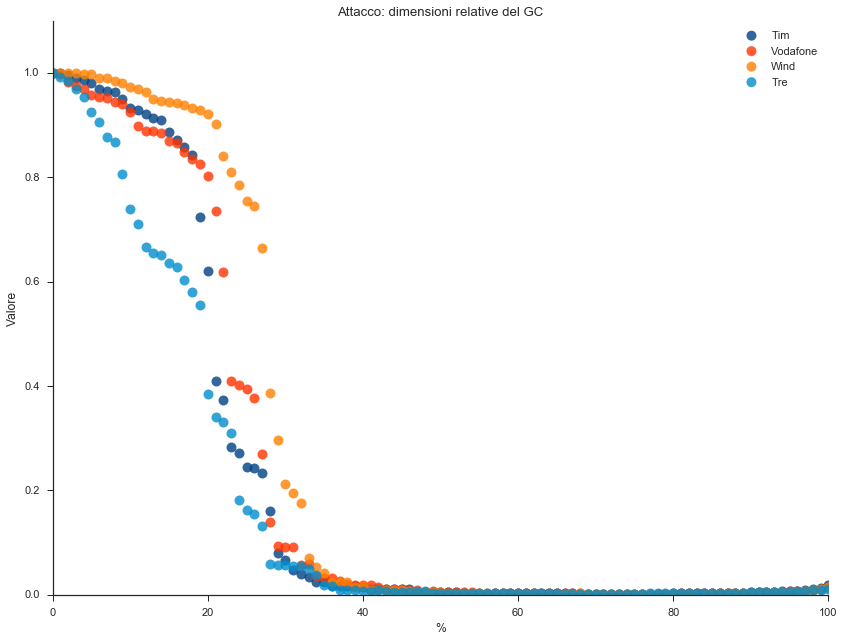

In [19]:
#Attack
import seaborn

datiFinal = pandas.read_csv('/home/protoss/Documenti/SistemiComplessi/data/Iuri/AttackDataForSeaborn.csv')
#datiFinal = pandas.read_csv('/home/protoss/Documenti/SistemiComplessi/data/Iuri/GtoolAttackDataForSeaborn.csv')

seaborn.set_context("notebook", font_scale=1.1)
seaborn.set_style("ticks")

#diametro
seaborn.lmplot('percent', 'diameter', data=datiFinal, fit_reg=False,
               size = 9, aspect = 1.3333,
               legend = False,
               hue='provider', palette = colori,
               scatter_kws={"marker": "D", "s": 100})
pyplot.title('Attacco: diametro')
pyplot.xlabel("%")
pyplot.ylabel("Valore")
pyplot.xlim(0, 100)
pyplot.ylim(0, 80)
pyplot.legend()
pyplot.savefig('/home/protoss/Documenti/SistemiComplessi/img/iuri/AttackD_Final', format='svg', dpi=1000)
#pyplot.savefig('/home/protoss/Documenti/SistemiComplessi/img/iuri/gToolAttackD_Final', format='eps', dpi=1000)

#giant cluster
seaborn.lmplot('percent', 'GCsize', data=datiFinal, fit_reg=False,
           size = 9, aspect = 1.3333,
           legend = False,
           hue='provider', palette = colori,
           scatter_kws={"marker": "D", "s": 100})
pyplot.title('Attacco: dimensioni relative del GC')
pyplot.xlabel("%")
pyplot.ylabel("Valore")
pyplot.xlim(0, 100)
pyplot.ylim(0,1.1)
pyplot.legend()
pyplot.savefig('/home/protoss/Documenti/SistemiComplessi/img/iuri/AttackGC_Final', format='svg', dpi=1000)
#pyplot.savefig('/home/protoss/Documenti/SistemiComplessi/img/iuri/gToolAttackGC_Final', format='eps', dpi=1000)

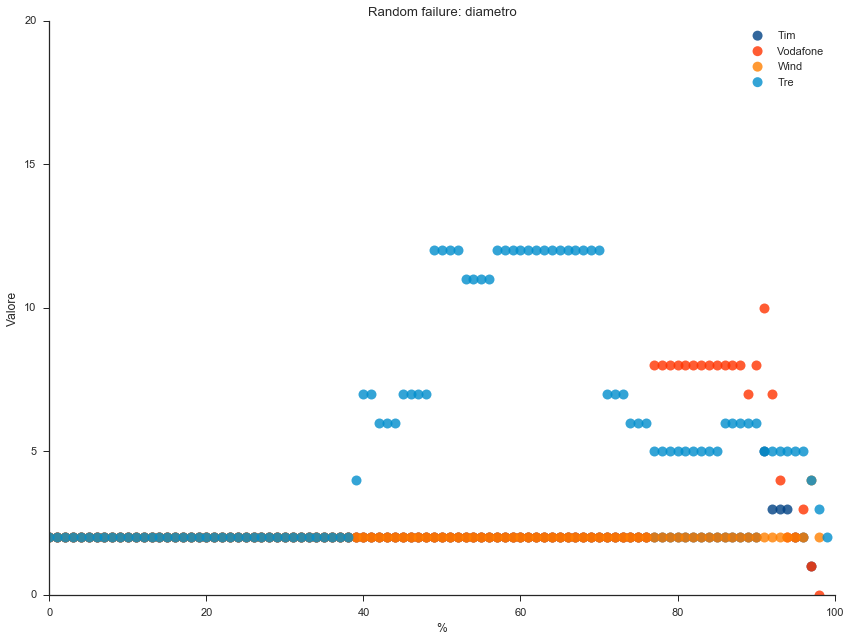

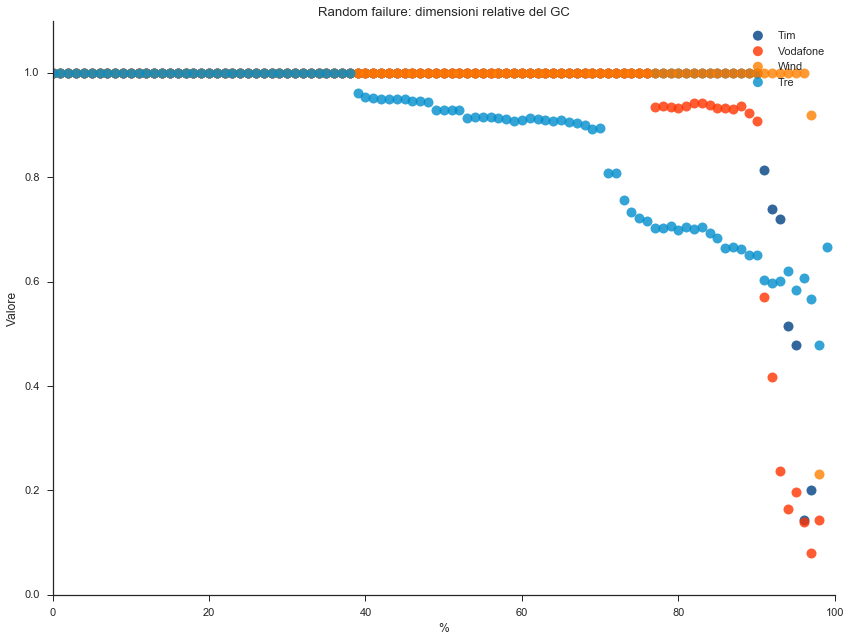

In [20]:
#Failure
import seaborn

datiFinal = pandas.read_csv('../../data/Iuri/FailureDataForSeaborn.csv')

seaborn.set_context("notebook", font_scale=1.1)
seaborn.set_style("ticks")

#diametro
seaborn.lmplot('percent', 'diameter', data=datiFinal, fit_reg=False,
           size = 9, aspect = 1.3333,
           legend = False,
           hue='provider', palette = colori,
           scatter_kws={"marker": "D", "s": 100})
pyplot.title('Random failure: diametro')
pyplot.xlabel("%")
pyplot.ylabel("Valore")
pyplot.xlim(0, 100)
pyplot.ylim(0, 20)
pyplot.legend()
pyplot.savefig('../../img/iuri/FailureD_Final', format='svg', dpi=1000)

#giant cluster
seaborn.lmplot('percent', 'GCsize', data=datiFinal, fit_reg=False,
           size = 9, aspect = 1.3333,
           legend = False,
           hue='provider', palette = colori,
           scatter_kws={"marker": "D", "s": 100})
pyplot.title('Random failure: dimensioni relative del GC')
pyplot.xlabel("%")
pyplot.ylabel("Valore")
pyplot.xlim(0, 100)
pyplot.ylim(0,1.1)
pyplot.legend()
pyplot.savefig('../../img/iuri/FailureGC_Final', format='svg', dpi=1000)

# CALCOLO DEL DIAMETRO DI RETE ROMA IMPOSSIBILE, ANDAMENTO ESPONENZIALE CON L'AUMENTARE DEI NODI


#### 10 steps

CPU times: user 30.2 s, sys: 156 ms, total: 30.4 s  
Wall time: 30.1 s  
CPU times: user 14.1 s, sys: 56 ms, total: 14.2 s  
Wall time: 14.1 s  
CPU times: user 1min 7s, sys: 352 ms, total: 1min 7s  
Wall time: 1min 6s  
CPU times: user 12 s, sys: 72 ms, total: 12.1 s  
Wall time: 11.9 s


#### 20 steps

CPU times: user 1min 6s, sys: 368 ms, total: 1min 6s  
Wall time: 1min 5s  
CPU times: user 29 s, sys: 176 ms, total: 29.2 s  
Wall time: 28.9 s  
CPU times: user 2min 28s, sys: 848 ms, total: 2min 29s  
Wall time: 2min 27s  
CPU times: user 25.4 s, sys: 116 ms, total: 25.6 s  
Wall time: 25.4 s  

